<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360"/>

# Olist Orders Exploratory Data Analysis 
**[Data Courtesy: Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce/home#olist_orders_dataset.csv)**

## Table of Contents

1. [Objective](#section1)
    - 1.1 [Prepare for Data Analysis](#section101)
2. [Data Loading and Description](#section2)
    - 2.1 [Import the data](#section201)
    - 2.2 [Observations](#section202)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)
        - 3.1.1 [Observations](#section30101)
    - 3.2 [Pre-Profiling](#section302)
        - 3.2.1 [Observations](#section30201)
    - 3.3 [Preprocessing](#section303)
        - 3.3.1 [Remove Unique Columns](#section30301)
        - 3.3.2 [Convert timestamps to datetime datatype](#section30302)
        - 3.3.3 [Identify data integrity](#section30303)
        - 3.3.4 [Derived Columns](#section30304)
    - 3.4 [Post Profiling](#section304)
        - 3.4.1 [Observations](#section30401)
        - 3.4.2 [Remove negligible data](#section30402)
4. [Questions: Delivery Performance](#section4)
    - 4.1 [How is the performance of approval vs carrier handover vs customer handover](#section401)
        - 4.1.1 [Observations](#section40101)
    - 4.2 [How is the performance of approval over months?](#section402)
        - 4.2.1 [Observations](#section40201)
    - 4.3 [How is the performance of carrier handover over months?](#section403)
        - 4.3.1 [Observations](#section40301)
    - 4.4 [How is the performance of customer handover over months?](#section404)
        - 4.4.1 [Observations](#section40401)
5. [Questions: Orders over time](#section5)
    - 5.1 [How is the orders count over years?](#section501)
        - 5.1.1 [Observations](#section50101)
    - 5.2 [How is the orders count over months?](#section502)
        - 5.2.1 [Observations](#section50201)
    - 5.3 [How is the orders count over weeks?](#section503)
        - 5.3.1 [Observations](#section50301)
    - 5.4 [What is the 24 hour purchase trend by the customers?](#section504)
        - 5.4.1 [Observations](#section50401)
    - 5.5 [What is the 24 hour approval trend by the sellers?](#section505)
        - 5.5.1 [Observations](#section50501)
    - 5.6 [What is the 24 hour carrier handover trend by the sellers?](#section506)
        - 5.6.1 [Observations](#section50601)
    - 5.7 [What is the 24 hour customer handover trend by the carriers?](#section507)
        - 5.6.1 [Observations](#section50701)
6. [Conclusions](#section6)<br/> 

<a id="section1"></a>
### 1. Objective 

Explore patterns and behaviours of **Delivery Performance** & **Orders over Time** on an e-commerce **Orders** dataset.

<a id="section101"></a>
#### 1.1. Prepare for Data Analysis

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

<a id="section2"></a>
### 2. Data Loading and Description

<a id="section201"></a>
#### 2.1. Import the data

The data is available on **Kaggle** [here](https://www.kaggle.com/olistbr/brazilian-ecommerce/home#olist_orders_dataset.csv).
This is Orders data for a Brazilian e-commerce company named *OList*. Originally the whole set of datasets provided contains Orders, Order_Payments, Order_Items, Order_Reviews, Customer, etc. But for our purpose of analyzing the Delivery Performance and Orders across Time, we have chosen just the "Orders" data.

Also, since the data is available in a `.zip` file format, its advised to download the `.zip` file, extract it, keep the **olist_orders_dataset.csv** file along with this jupyter notebook.

In [2]:
orders = pd.read_csv("olist_orders_dataset.csv")

<a id="section202"></a>
#### 2.2. Observations

* **order_id**                      : unique order id for each order
* **customer_id**                   : customer who ordered
* **order_status**                  : current status of the order
* **order_purchase_timestamp**      : when was the order purchased by the customer
* **order_approved_at**             : when was the order approved by the seller
* **order_delivered_carrier_date**  : when was the order fulfilled to carrier by the seller
* **order_delivered_customer_date** : when was the order fulfilled to customer by the carrier
* **order_estimated_delivery_date** : what was the estimated time of delivery promised to the customer at the time of purchase

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<a id="section3"></a>
### 3. Data Profiling

Let's have a look at the data in a little more detail. We will look at various columns, their inherent datatypes; Shape of the data. We will then do some preprocessing and profiling of the data to gain some out of the box insights.

<a id="section301"></a>
#### 3.1. Understanding the Dataset

In [4]:
orders.shape

(99441, 8)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<a id="section30101"></a>
##### 3.1.1. Observations
* The dataset contains timestamps of various fulfilment stages
* The dataset has around 99k rows

<a id="section302"></a>
#### 3.2. Pre-Profiling
Let's do a pre-profiling of our dataset to identify uniqueness, missing data, column trends, corelations.

In [7]:
# pandas_profiling.ProfileReport(orders).to_file('orders_before.html')

<a id="section30201"></a>
##### 3.2.1. Observations
* Looks like the profiling did not run properly here, we might have to do some preprocessing by hand before we run another profiling

<a id="section303"></a>
#### 3.3. Preprocessing

<a id="section30301"></a>
##### 3.3.1. Remove Unique Columns

In [8]:
orders.info()
print()
print("Unique Order Ids : {}".format(orders.order_id.nunique()))
print("Unique Customer Ids: {}".format(orders.customer_id.nunique()))

# each row of the dataset has uniqueness of order_id and customer_id
# each order has a status, purchase time & estimated delivery date

#ACTION: convert all timestamp columns to datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB

Unique Order Ids : 99441
Unique Customer Ids: 99441


In [9]:
# Since we are only dealing with order delivery performance, we can remove the customer_id column
orders.drop('customer_id', axis=1, inplace=True)
# We can rely on natural dataframe index, so we can remove order_id column
orders.drop('order_id', axis=1, inplace=True)

<a id="section30302"></a>
##### 3.3.2. Convert timestamps to datetime datatype

In [10]:
# Convert all date and time coluums to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

<a id="section30303"></a>
##### 3.3.3. Identify data integrity
Correct orders should be one which were purchased, approved, handed over to carrier, handed over to customer

In [11]:
purchase_na = orders.order_purchase_timestamp.isna()
approved_na = orders.order_approved_at.isna()
carrier_na = orders.order_delivered_carrier_date.isna()
customer_na = orders.order_delivered_customer_date.isna()

print("Total Orders: {}".format(orders.shape[0]))
print("Total Purchase: {}".format(orders[~(purchase_na)].shape[0]))
print("purchased, not approved: {}".format(orders[~(purchase_na) & (approved_na)].shape[0]))
print("purchased, approved: {}".format(orders[~(purchase_na) & ~(approved_na)].shape[0]))
print("purchased, approved, not delivered to carrier: {}".format(orders[~(purchase_na) & ~(approved_na) & (carrier_na)].shape[0]))
print("purchased, approved, delivered to carrier: {}".format(orders[~(purchase_na) & ~(approved_na) & ~(carrier_na)].shape[0]))
print("purchased, approved, delivered to carrier, not delivered to customer: {}".format(orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & (customer_na)].shape[0]))
print("purchased, approved, delivered to carrier, delivereed to customer: {}".format(orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & ~(customer_na)].shape[0]))

Total Orders: 99441
Total Purchase: 99441
purchased, not approved: 160
purchased, approved: 99281
purchased, approved, not delivered to carrier: 1637
purchased, approved, delivered to carrier: 97644
purchased, approved, delivered to carrier, not delivered to customer: 1183
purchased, approved, delivered to carrier, delivereed to customer: 96461


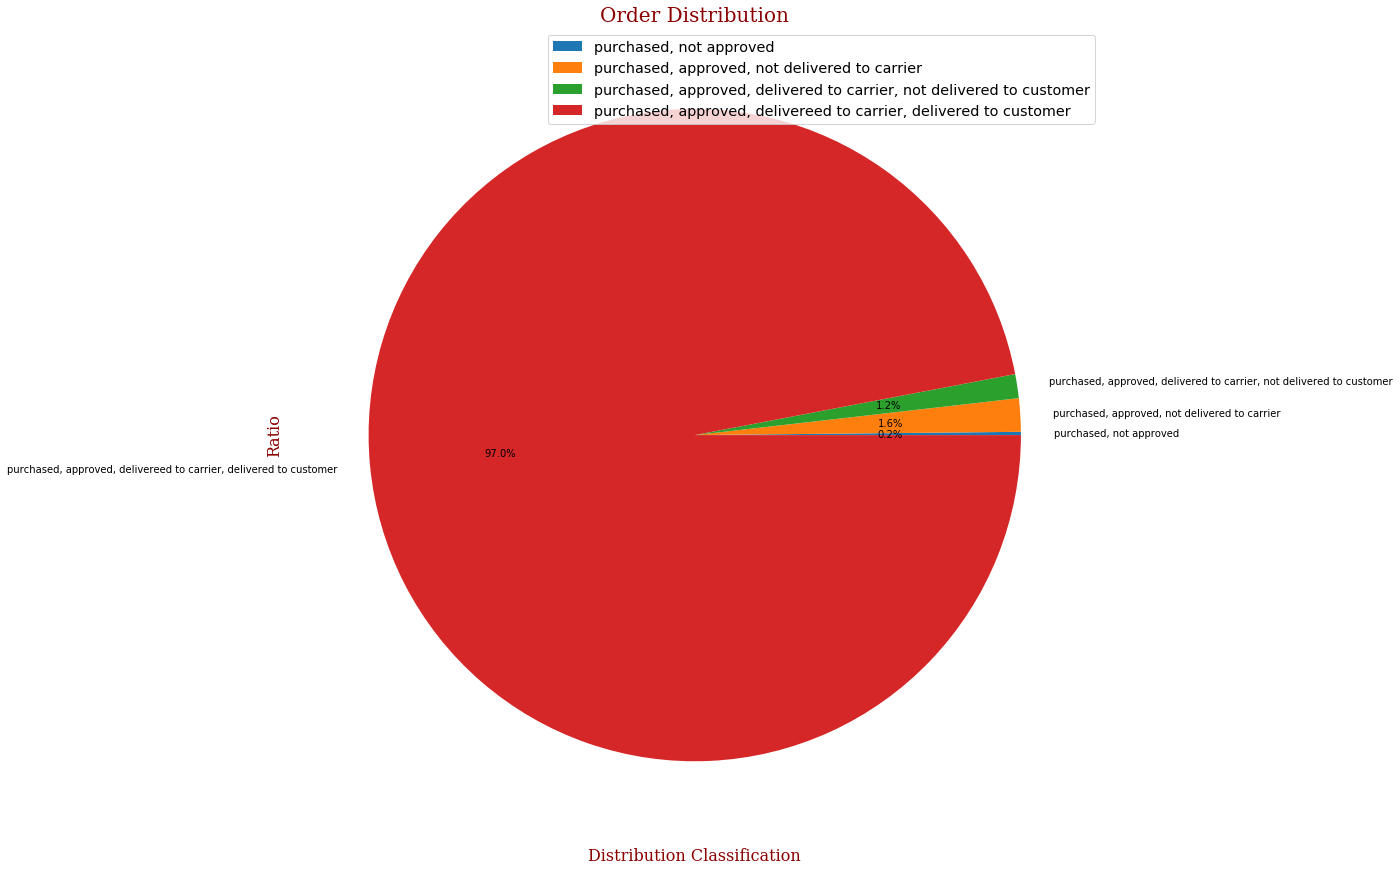

In [12]:
orders_len = len(orders)
dist = pd.DataFrame({'Ratio' :[orders[~(purchase_na) & (approved_na)].shape[0]/orders_len, orders[~(purchase_na) & ~(approved_na) & (carrier_na)].shape[0]/orders_len, orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & (customer_na)].shape[0]/orders_len, orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & ~(customer_na)].shape[0]/orders_len]}, index = ['purchased, not approved','purchased, approved, not delivered to carrier', 'purchased, approved, delivered to carrier, not delivered to customer', 'purchased, approved, delivereed to carrier, delivered to customer'])

dist.plot.pie(y='Ratio', autopct='%1.1f%%')
plt.title('Order Distribution', size=20, fontdict=font)
plt.xlabel('Distribution Classification', fontdict=font)
plt.ylabel('Ratio', fontdict=font)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(15, 15)

In [13]:
# Select orders which were purchased, approved, delivered to carrier, delivered to customer
od = orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & ~(customer_na)].copy()

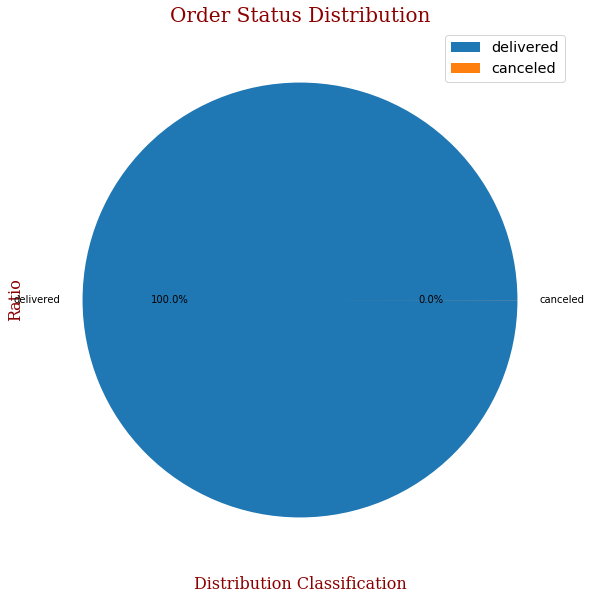

In [14]:
od.order_status.value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Order Status Distribution', size=20, fontdict=font)
plt.xlabel('Distribution Classification', fontdict=font)
plt.ylabel('Ratio', fontdict=font)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(10, 10)

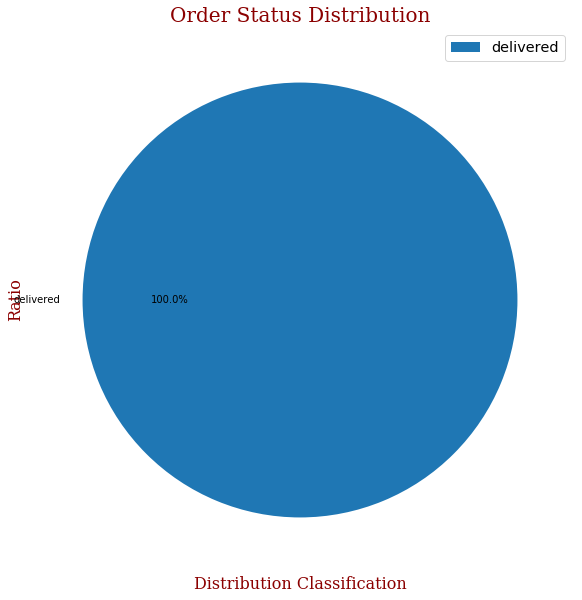

In [15]:
# od contains all delivered orders, so order_status must all be delivered, let's check
od.drop(index=od[od.order_status=='canceled'].index, inplace=True)
od.order_status.value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Order Status Distribution', size=20, fontdict=font)
plt.xlabel('Distribution Classification', fontdict=font)
plt.ylabel('Ratio', fontdict=font)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(10, 10)

In [16]:
# Since all order_status are "delivered", we can drop the column
od.drop('order_status', axis=1, inplace=True)

In [17]:
od.reset_index(inplace=True)
od.drop('index', axis=1, inplace=True)
od.tail()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
96450,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
96451,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
96452,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
96453,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15
96454,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03


<a id="section30304"></a>
##### 3.3.4. Derived Columns
* Difference of time between delivery stages
* Split customer delivery time to year, month, day, weekday_number

In [18]:
# Difference between delivery levels
ods_purchased_at = od['order_purchase_timestamp']
ods_approved_at = od['order_approved_at']
ods_deli_carrier_at = od['order_delivered_carrier_date']
ods_deli_customer_at = od['order_delivered_customer_date']
ods_est_deli_at = od['order_estimated_delivery_date']

od['order_approval_hours'] = (ods_approved_at - ods_purchased_at).apply(lambda x: x.seconds/3600)
od['seller_to_carrier_hours'] = (ods_deli_carrier_at - ods_approved_at).apply(lambda x: x.seconds/3600)
od['carrier_to_customer_hours'] = (ods_deli_customer_at - ods_deli_carrier_at).apply(lambda x: x.seconds/3600)
od['early_delivery_hours'] = (ods_est_deli_at - ods_deli_customer_at).apply(lambda x: x.seconds/3600)

od.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_hours,seller_to_carrier_hours,carrier_to_customer_hours,early_delivery_hours
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,8.795833,1.503611,2.579722
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,6.713889,11.109167,0.945833,8.537500
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,4.910278,4.274722,5.891944
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,17.900000,10.811944,23.521667
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,21.434722,22.507778,5.716111


In [19]:
# date analysis on order delivered to customer timestamp
od['od_year'] = od['order_delivered_customer_date'].dt.year
od['od_month'] = od['order_delivered_customer_date'].dt.month
od['od_day'] = od['order_delivered_customer_date'].dt.day
od['od_weekday_number'] = od['order_delivered_customer_date'].dt.dayofweek

od.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_approval_hours,seller_to_carrier_hours,carrier_to_customer_hours,early_delivery_hours,od_year,od_month,od_day,od_weekday_number
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,8.795833,1.503611,2.579722,2017,10,10,1
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,6.713889,11.109167,0.945833,8.537500,2018,8,7,1
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,4.910278,4.274722,5.891944,2018,8,17,4
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,17.900000,10.811944,23.521667,2017,12,2,5
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,21.434722,22.507778,5.716111,2018,2,16,4


<a id="section304"></a>
#### 3.4. Post-Profiling

In [20]:
pandas_profiling.ProfileReport(od).to_file('orders_after.html')

<a id="section30401"></a>
##### 3.4.1. Observations
* Usually, the orders are approved within 2.5 hours of purchase
* Seller to Carrier hours has a nearly quadratic relationship wiith its frequency. The frequency first decreases with increase in time taken, reaches a minima near 10-15 hours and then frequency increases with increase in time taken.
* Carrier to Customer has a quadratic relationship with its frequency.
* Usually the time taken by the seller is more than the carrier to move the order ahead.
* Usually the item reaches customer 5-7 hours earlier than the promised estimated time of delivery
* The bottlenecks of delivery from purchase to customer handover are at seller and carrier.
* Negligible data for 2016

<a id="section30402"></a>
##### 3.4.2. Remove negligible data

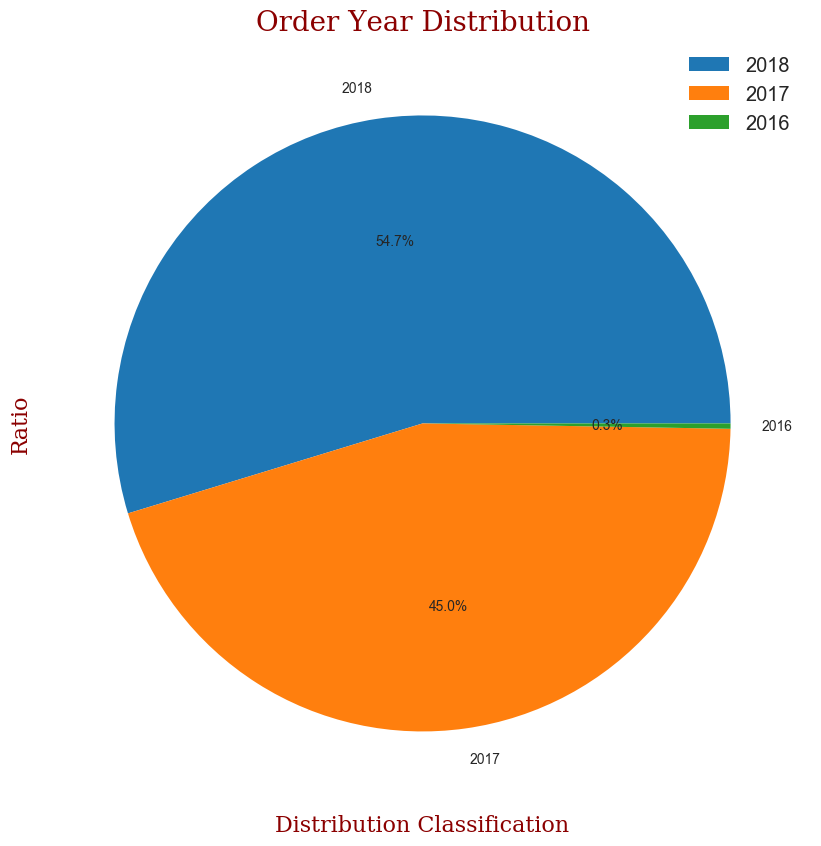

In [21]:
# Let's draw a pie chart to see the data distribution of years
od.order_purchase_timestamp.dt.year.value_counts().plot.pie(legend=True, autopct='%1.1f%%')
plt.title('Order Year Distribution', size=20, fontdict=font)
plt.xlabel('Distribution Classification', fontdict=font)
plt.ylabel('Ratio', fontdict=font)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(10, 10)

In [22]:
# discard 2016 data
od = od[(od.od_year==2017) | (od.od_year==2018)]

<a id="section4"></a>
### 4. Questions: Delivery Performance

<a id="section401"></a>
#### 4.1. How is the performance of approval vs carrier handover vs customer handover?

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text yticklabel objects>)

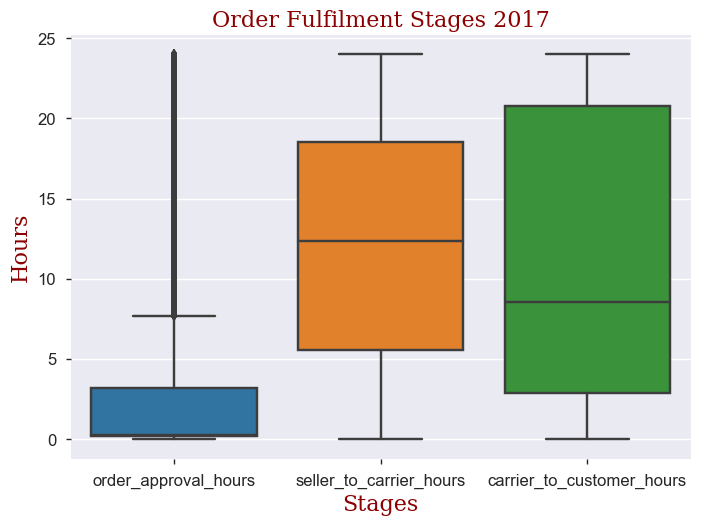

In [23]:
sns.boxplot(data=od[od.od_year == 2017].loc[:, ['order_approval_hours', 'seller_to_carrier_hours', 'carrier_to_customer_hours']])
plt.title('Order Fulfilment Stages 2017', fontdict=font)
plt.xlabel("Stages", fontdict=font)
plt.xticks(fontsize=12)
plt.ylabel('Hours', fontdict=font)
plt.yticks(fontsize=12)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text yticklabel objects>)

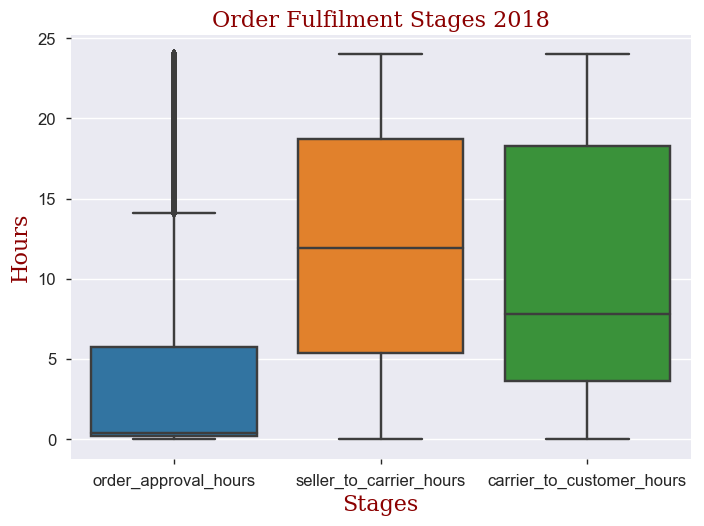

In [24]:
sns.boxplot(data=od[od.od_year == 2018].loc[:, ['order_approval_hours', 'seller_to_carrier_hours', 'carrier_to_customer_hours']])
plt.title('Order Fulfilment Stages 2018', fontdict=font)
plt.xlabel("Stages", fontdict=font)
plt.xticks(fontsize=12)
plt.ylabel('Hours', fontdict=font)
plt.yticks(fontsize=12)

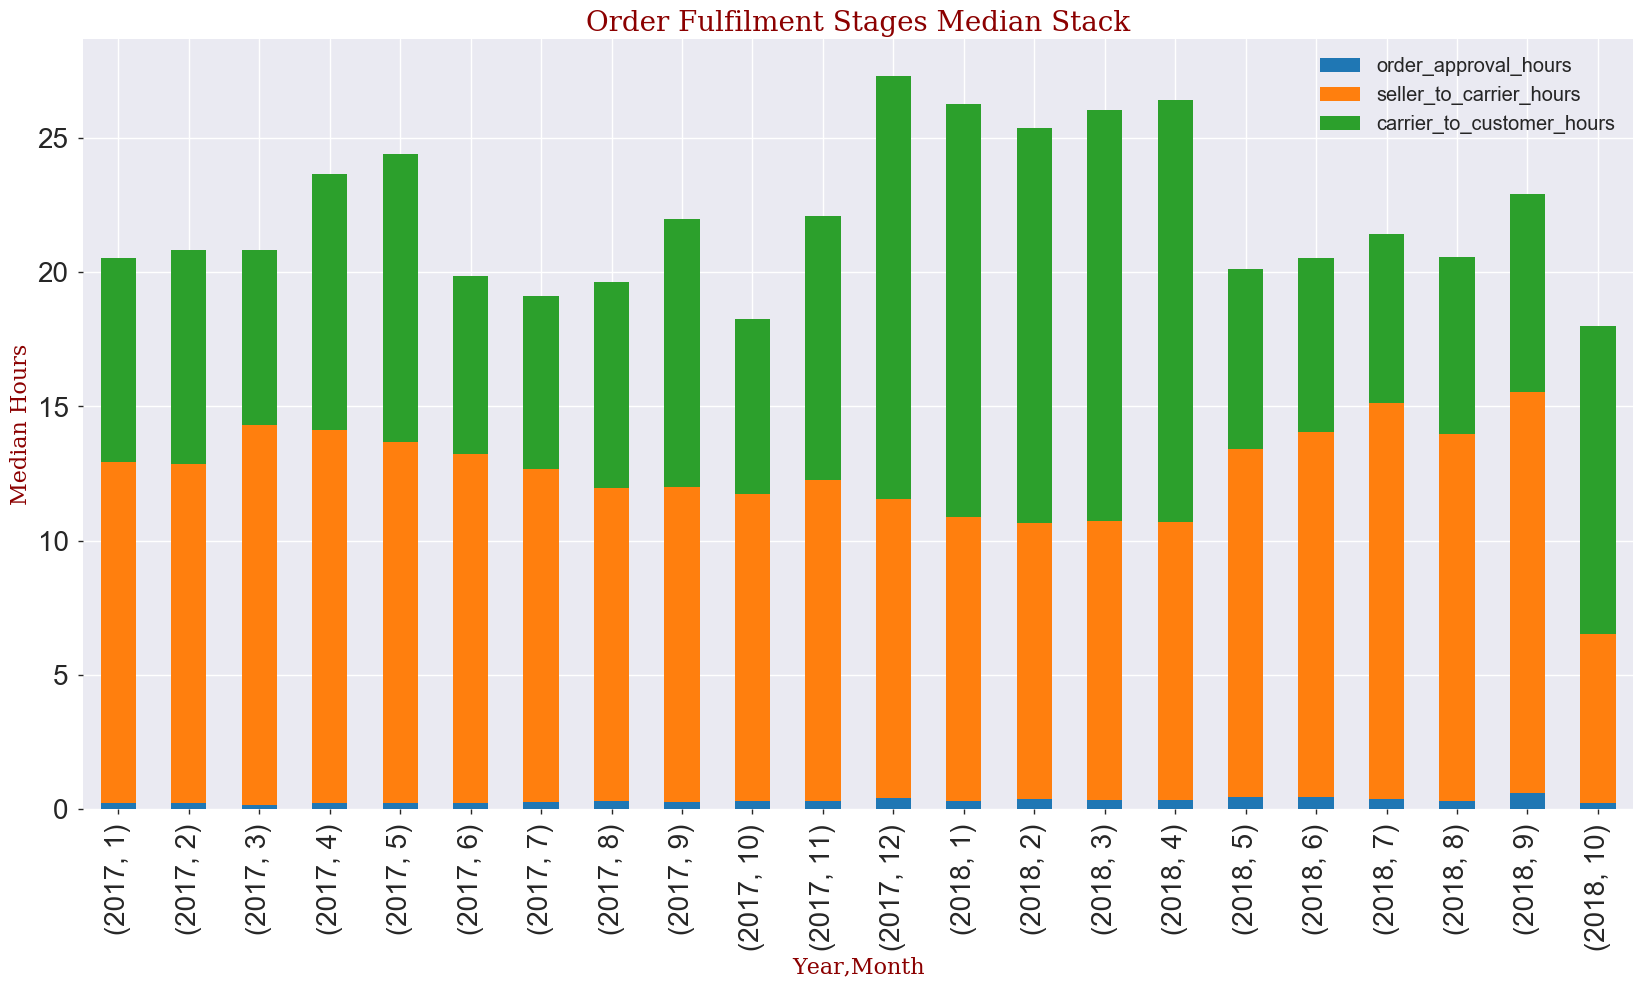

In [25]:
od[['order_approval_hours', 'seller_to_carrier_hours', 'carrier_to_customer_hours', 'od_year','od_month']].groupby(['od_year','od_month']).median().plot.bar(stacked=True)
plt.title('Order Fulfilment Stages Median Stack', size=20, fontdict=font)
plt.xlabel('Year,Month', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Median Hours', fontdict=font)
plt.yticks(fontsize=20)
plt.legend(loc='best', fontsize='x-large')
plt.gcf().set_size_inches(20, 10)


<a id="section40101"></a>
##### 4.1.1 Observations
* Approvals are quick as compared to both carrier & customer handovers.
* Carrier has improved its customer delivery hours variation in 2018
* Seller has consistently been the bottleneck in delivery, except first quarter of 2018

<a id="section402"></a>
#### 4.2. How is the performance of approval over months?

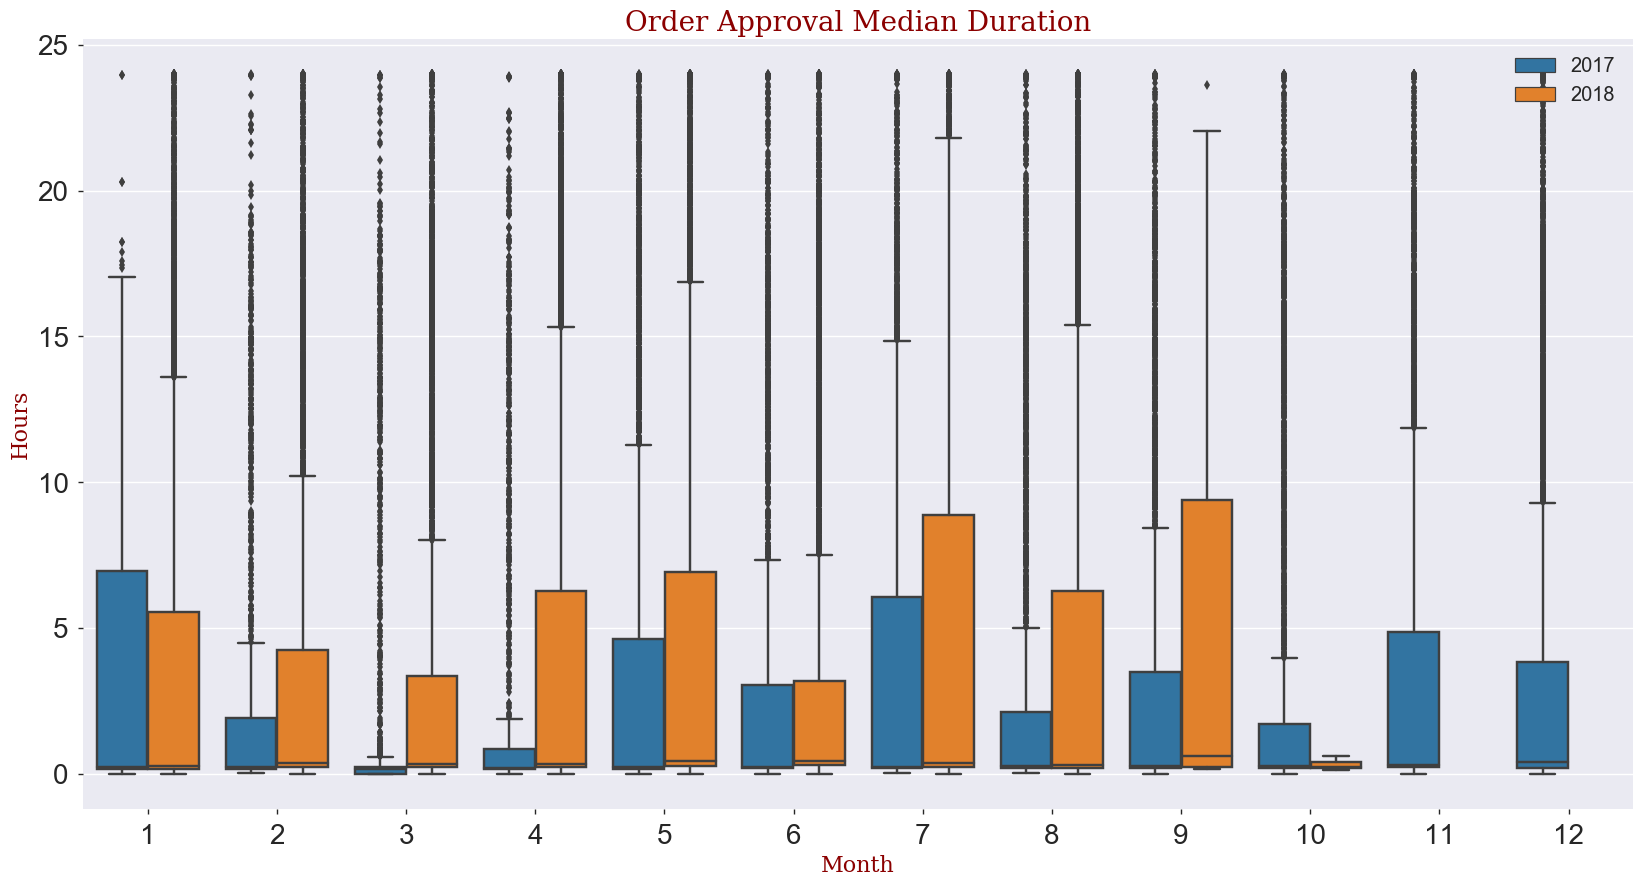

In [26]:
sns.boxplot(data=od[['order_approval_hours', 'od_month', 'od_year']], y='order_approval_hours', x='od_month', hue='od_year')
plt.title('Order Approval Median Duration', size=20, fontdict=font)
plt.xlabel('Month', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Hours', fontdict=font)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(20, 10)
#INSIGHT variation(or inconsistency) of approval hours has been more in 2018 than 2017

<a id="section40201"></a>
##### 4.2.1 Observations
* Approvals have had inconsistent variations over months for both 2017 & 2018
* Approval time variations are higher in 2018
* It usually takes between 0-5 hours for approvals.

<a id="section403"></a>
#### 4.3. How is the performance of carrier handover over months?

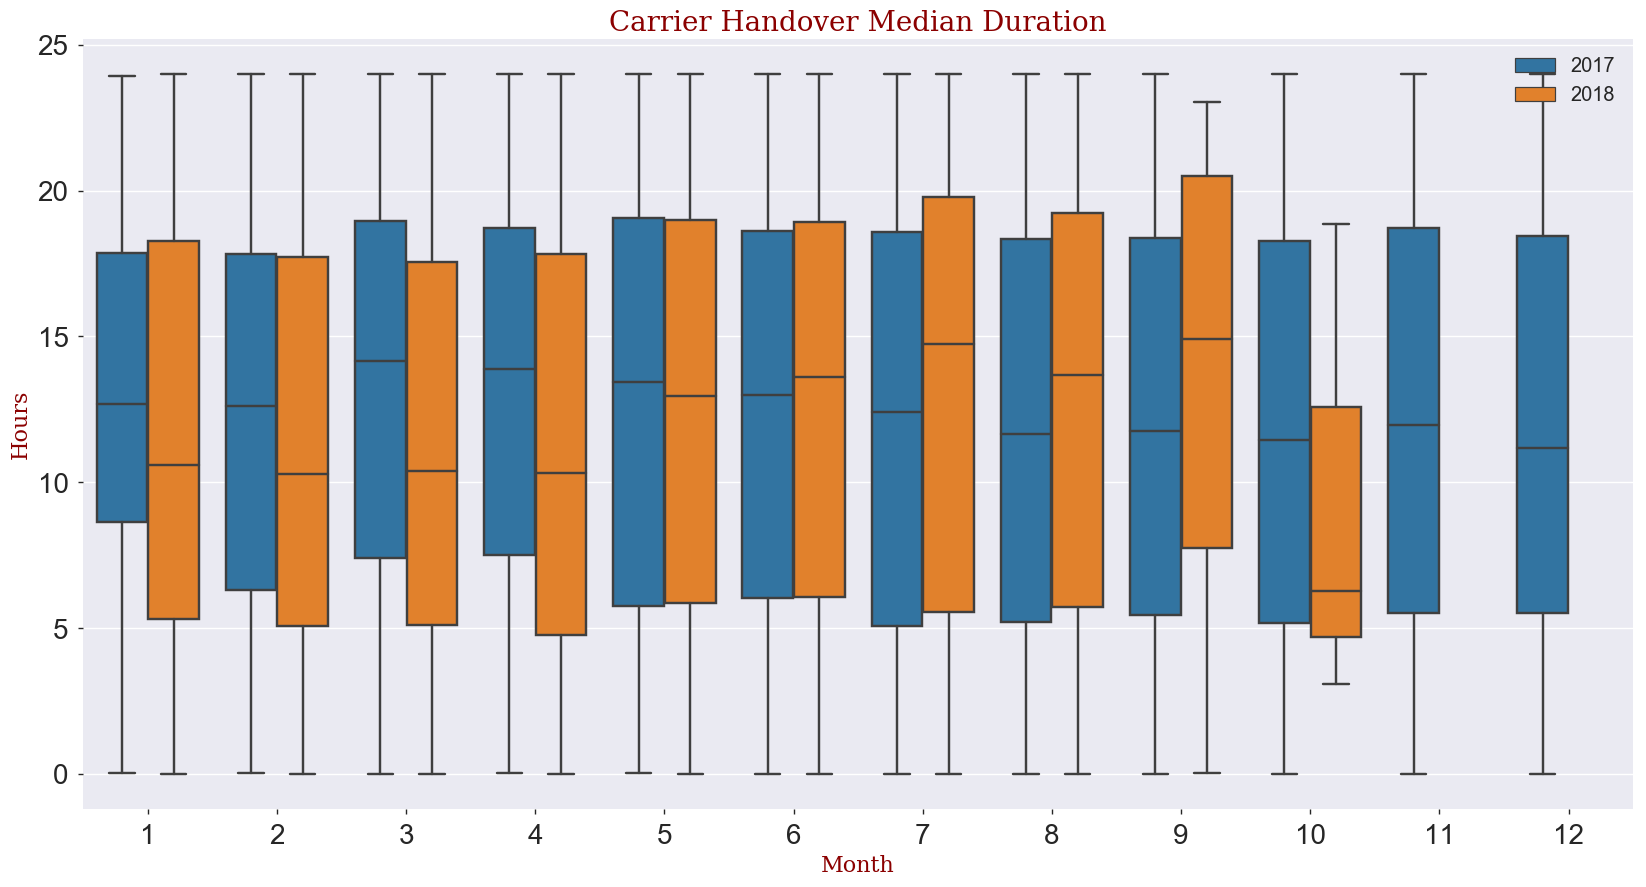

In [27]:
dt = od[['seller_to_carrier_hours', 'od_month', 'od_year']].sort_values(by='od_month')
sns.boxplot(data=dt, y='seller_to_carrier_hours', x='od_month', hue='od_year')
plt.title('Carrier Handover Median Duration', size=20, fontdict=font)
plt.xlabel('Month', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Hours', fontdict=font)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(20, 10)

<a id="section40301"></a>
##### 4.3.1 Observations
* Nearly no change in carrier handover performance over months in 2017
* The Median seems rising over months in 2018
* It usually takes 5-20 hours for carrier handover by the seller, This is high variation.

<a id="section404"></a>
#### 4.4. How is the performance of customer handover over months?

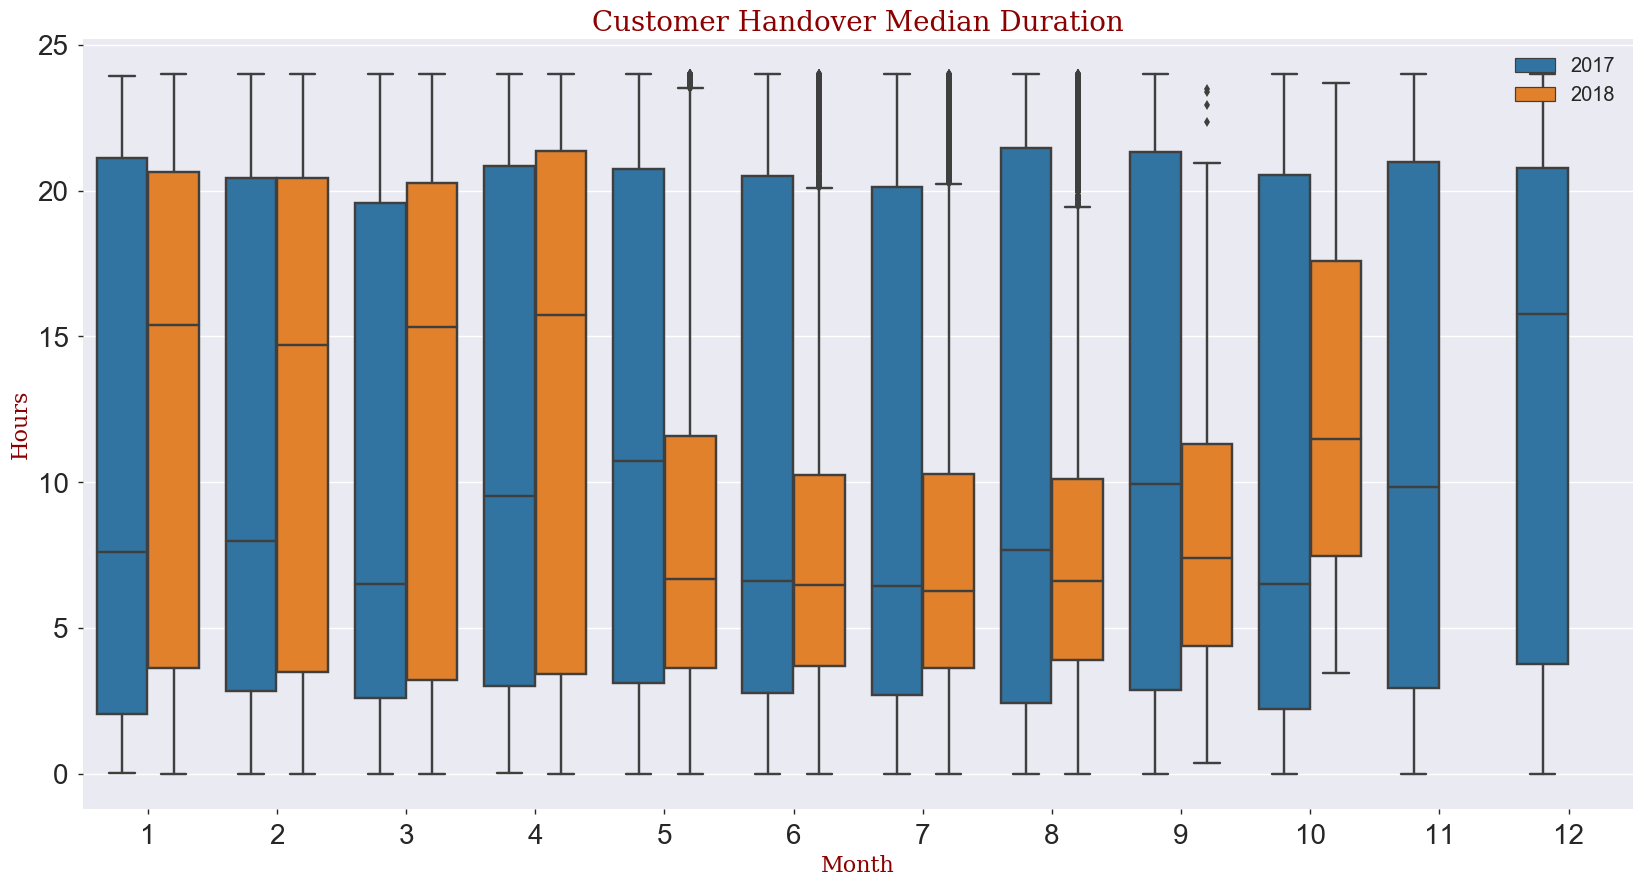

In [28]:
dt = od[['carrier_to_customer_hours', 'od_month', 'od_year']].sort_values(by='od_month')
sns.boxplot(data=dt, y='carrier_to_customer_hours', x='od_month', hue='od_year')
plt.title('Customer Handover Median Duration', size=20, fontdict=font)
plt.xlabel('Month', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Hours', fontdict=font)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(20, 10)

<a id="section40401"></a>
##### 4.4.1 Observations
* Customer handover delivery duration has been more consistent since may 2018

<a id="section5"></a>
### 5. Questions: Orders over time

<a id="section501"></a>
#### 5.1. How is the orders count over years?

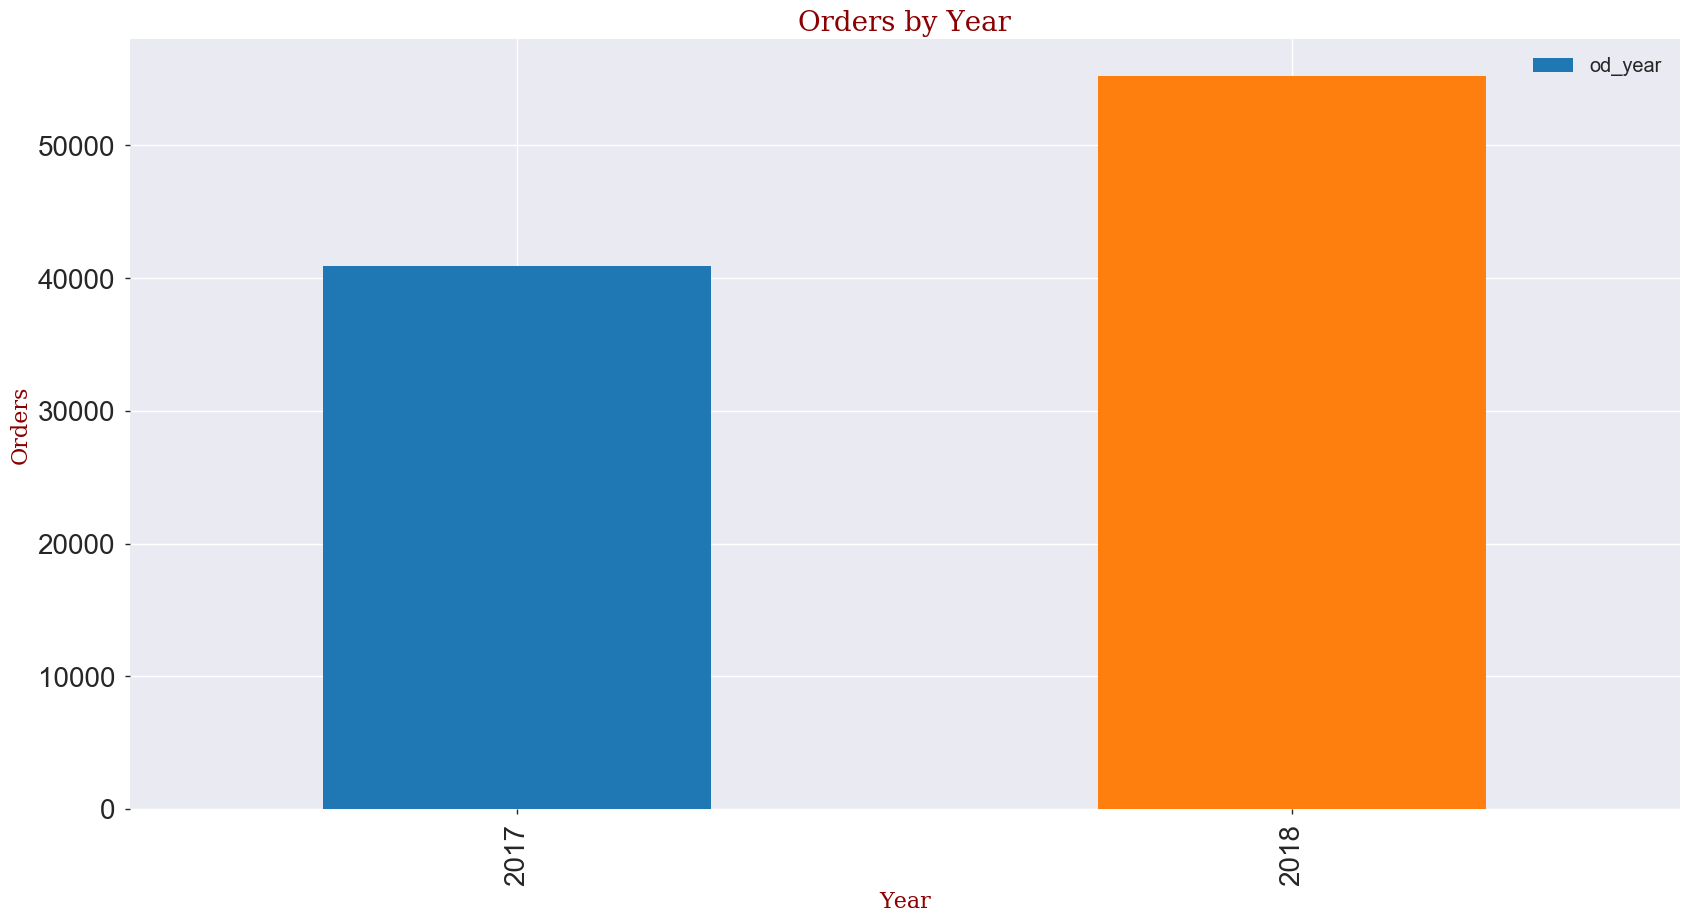

In [29]:
od['od_year'].value_counts().sort_index().plot.bar()
plt.title('Orders by Year', size=20, fontdict=font)
plt.xlabel('Year', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Orders', fontdict=font)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize='x-large')
plt.gcf().set_size_inches(20, 10)

<a id="section50101"></a>
#### 5.1.1. Observations
* Increase in orders over years

<a id="section502"></a>
#### 5.2. How is the orders count over months?

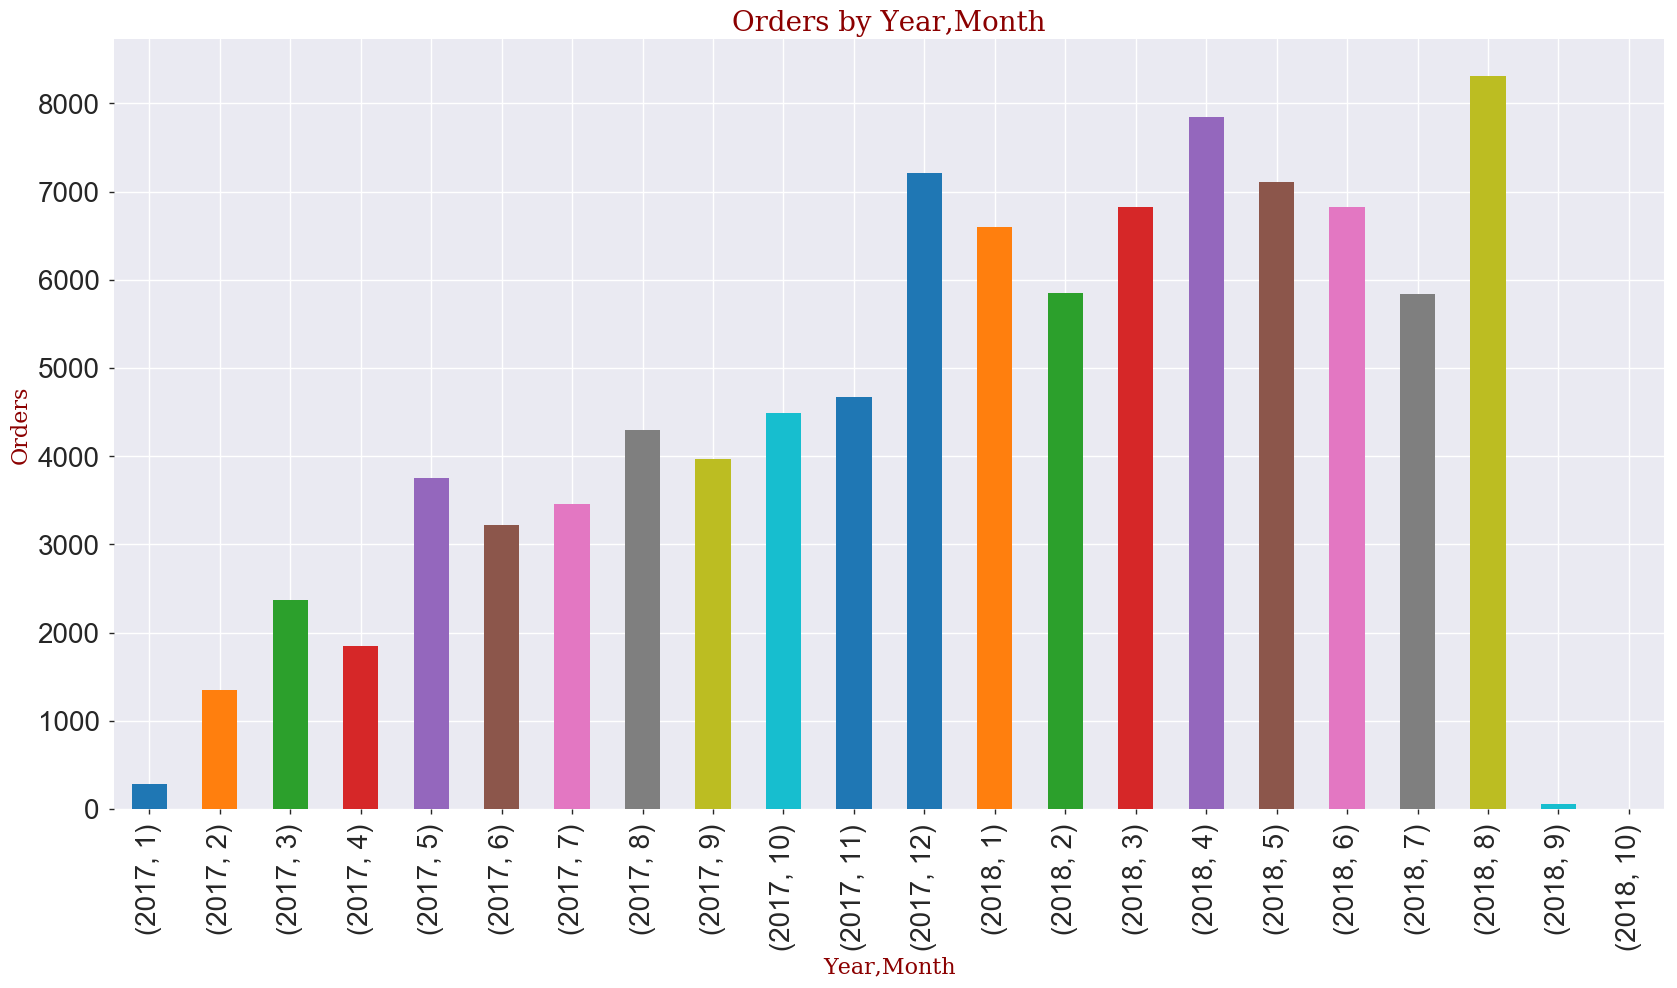

In [30]:
od.groupby(by=['od_year', 'od_month'])['order_approval_hours'].count().plot.bar()
plt.title('Orders by Year,Month', size=20, fontdict=font)
plt.xlabel('Year,Month', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Orders', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

<a id="section50201"></a>
#### 5.2.1. Observations
* Almost consistent orders increase over months in 2017
* Irregular orders over months in 2018

<a id="section503"></a>
#### 5.3. How is the orders count over weeks?

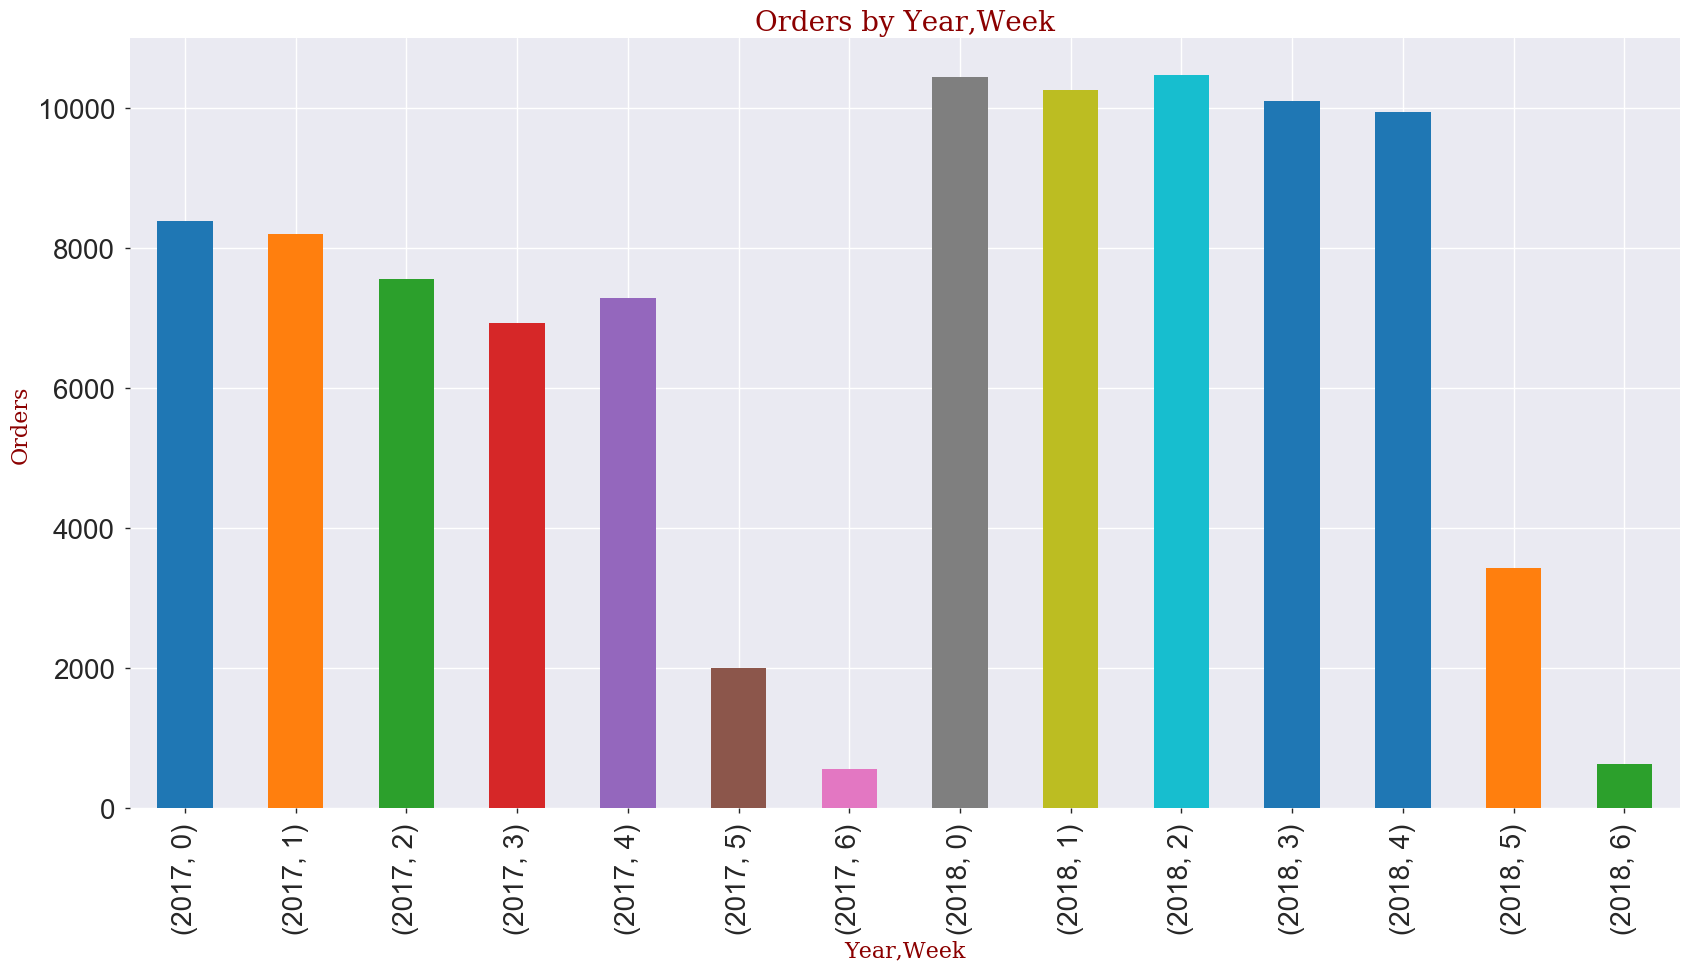

In [31]:
od.groupby(by=['od_year', 'od_weekday_number'])['order_approval_hours'].count().plot.bar()
plt.title('Orders by Year,Week', size=20, fontdict=font)
plt.xlabel('Year,Week', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Orders', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

<a id="section50301"></a>
#### 5.3.1. Observations
* Weekends see less orders as compared to weekdays

<a id="section504"></a>
#### 5.4. What is the 24 hour purchase trend by the customers?

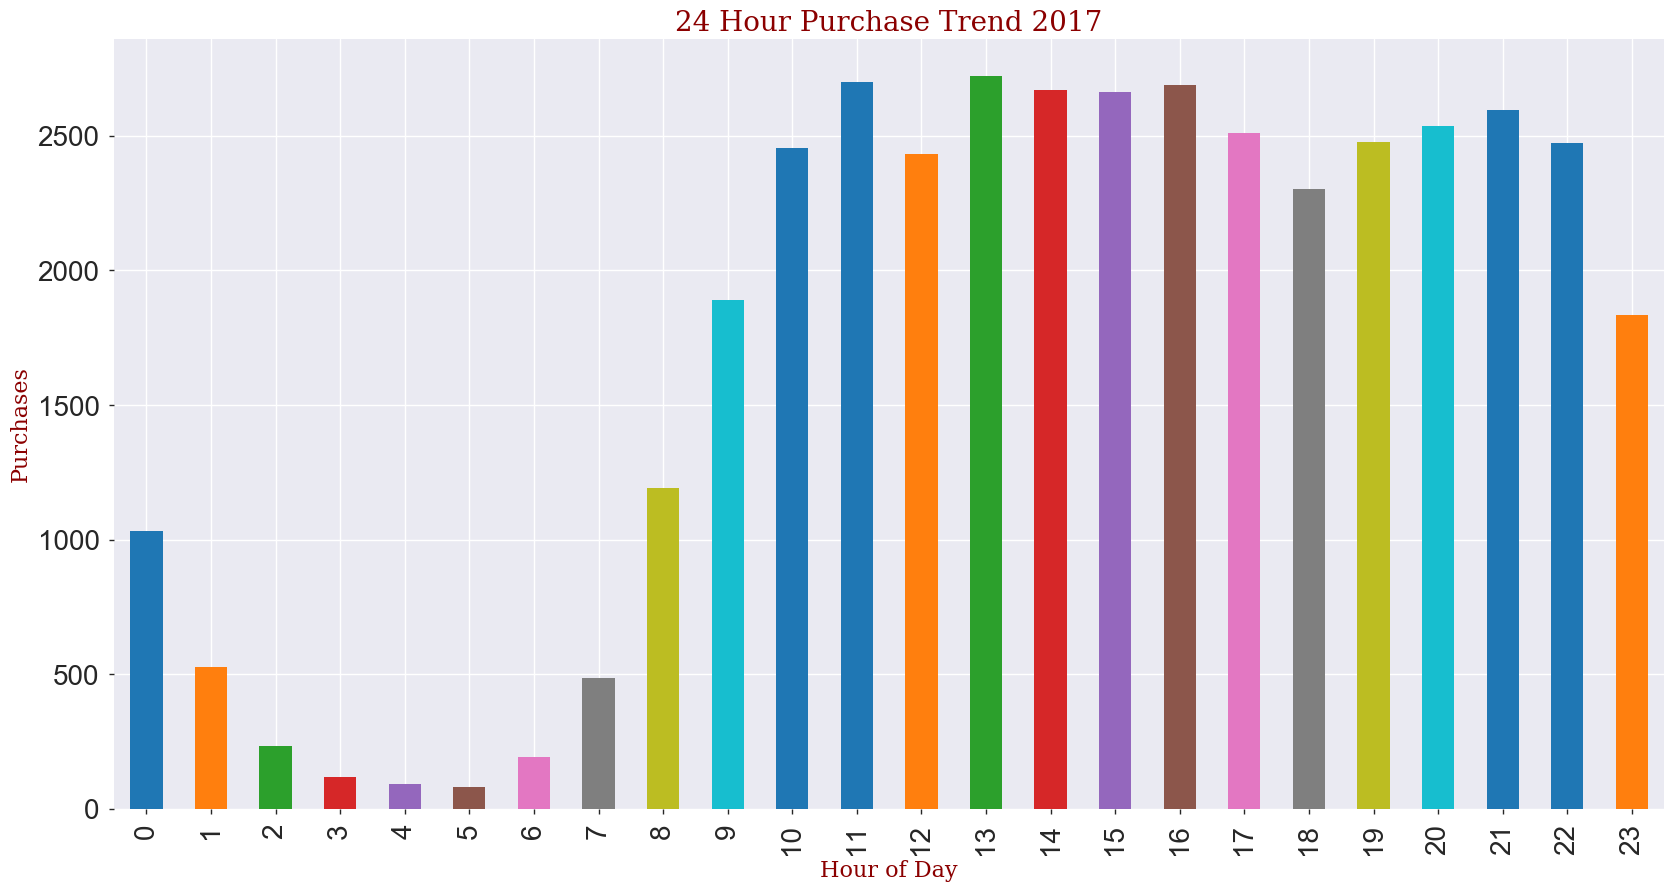

In [32]:
od[od.od_year == 2017]['order_purchase_timestamp'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Purchase Trend 2017', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Purchases', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

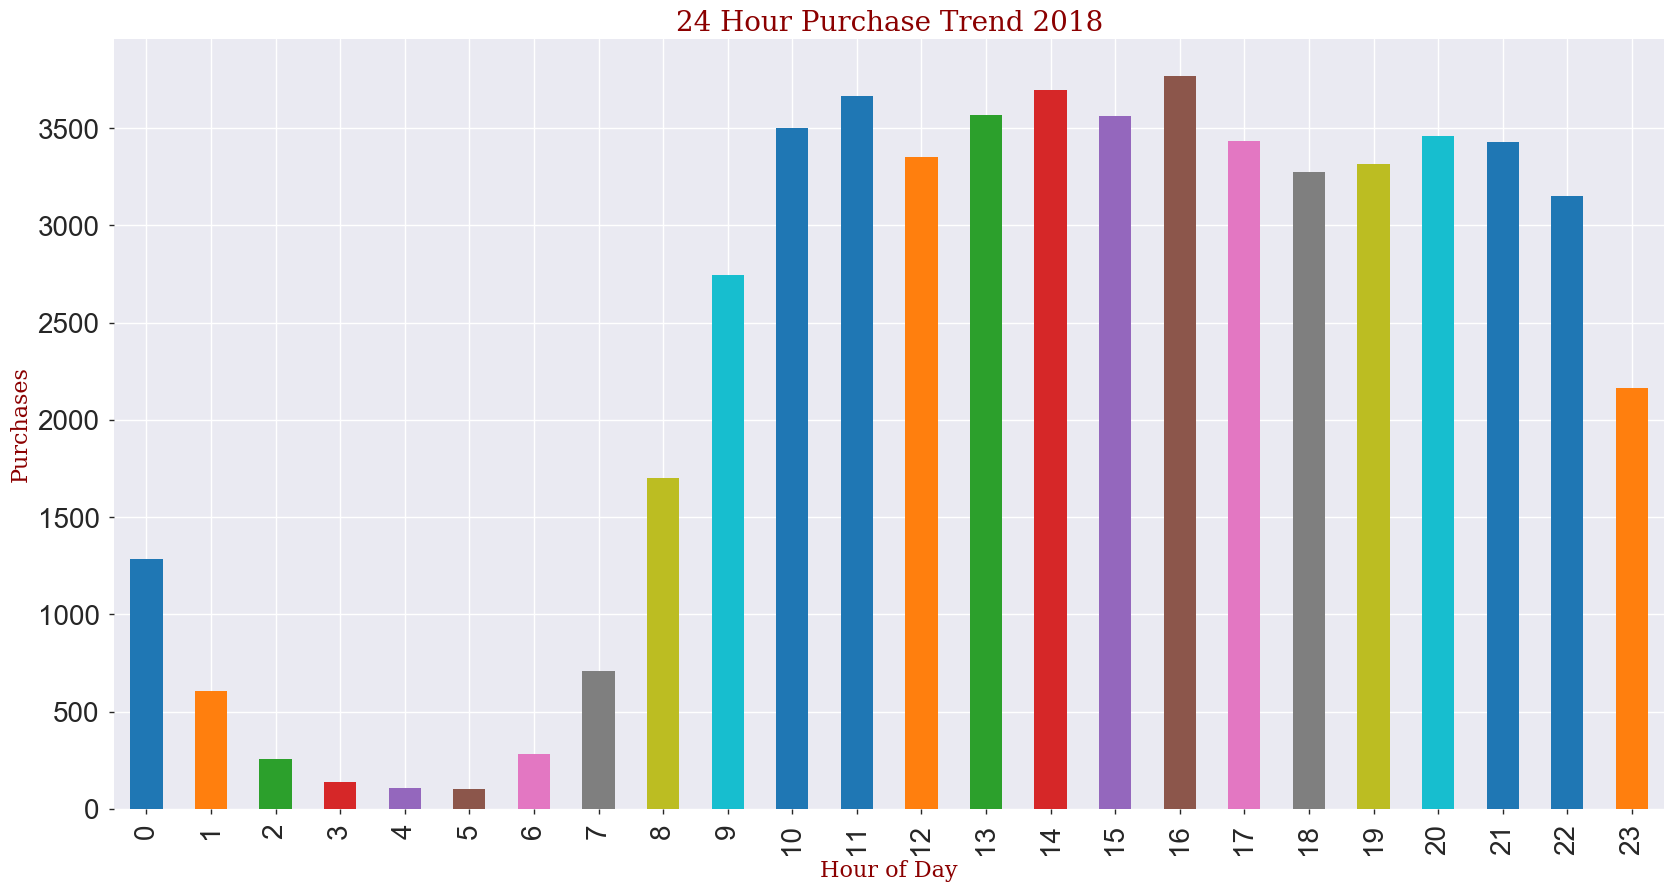

In [33]:
od[od.od_year == 2018]['order_purchase_timestamp'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Purchase Trend 2018', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Purchases', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

<a id="section50401"></a>
#### 5.4.1. Observations
* Rare purchases from midnight to early morning
* Almost consistent number of purchases from morning till late evening
* More purchases in 2018

<a id="section505"></a>
#### 5.5. What is the 24 hour approval trend by the sellers?

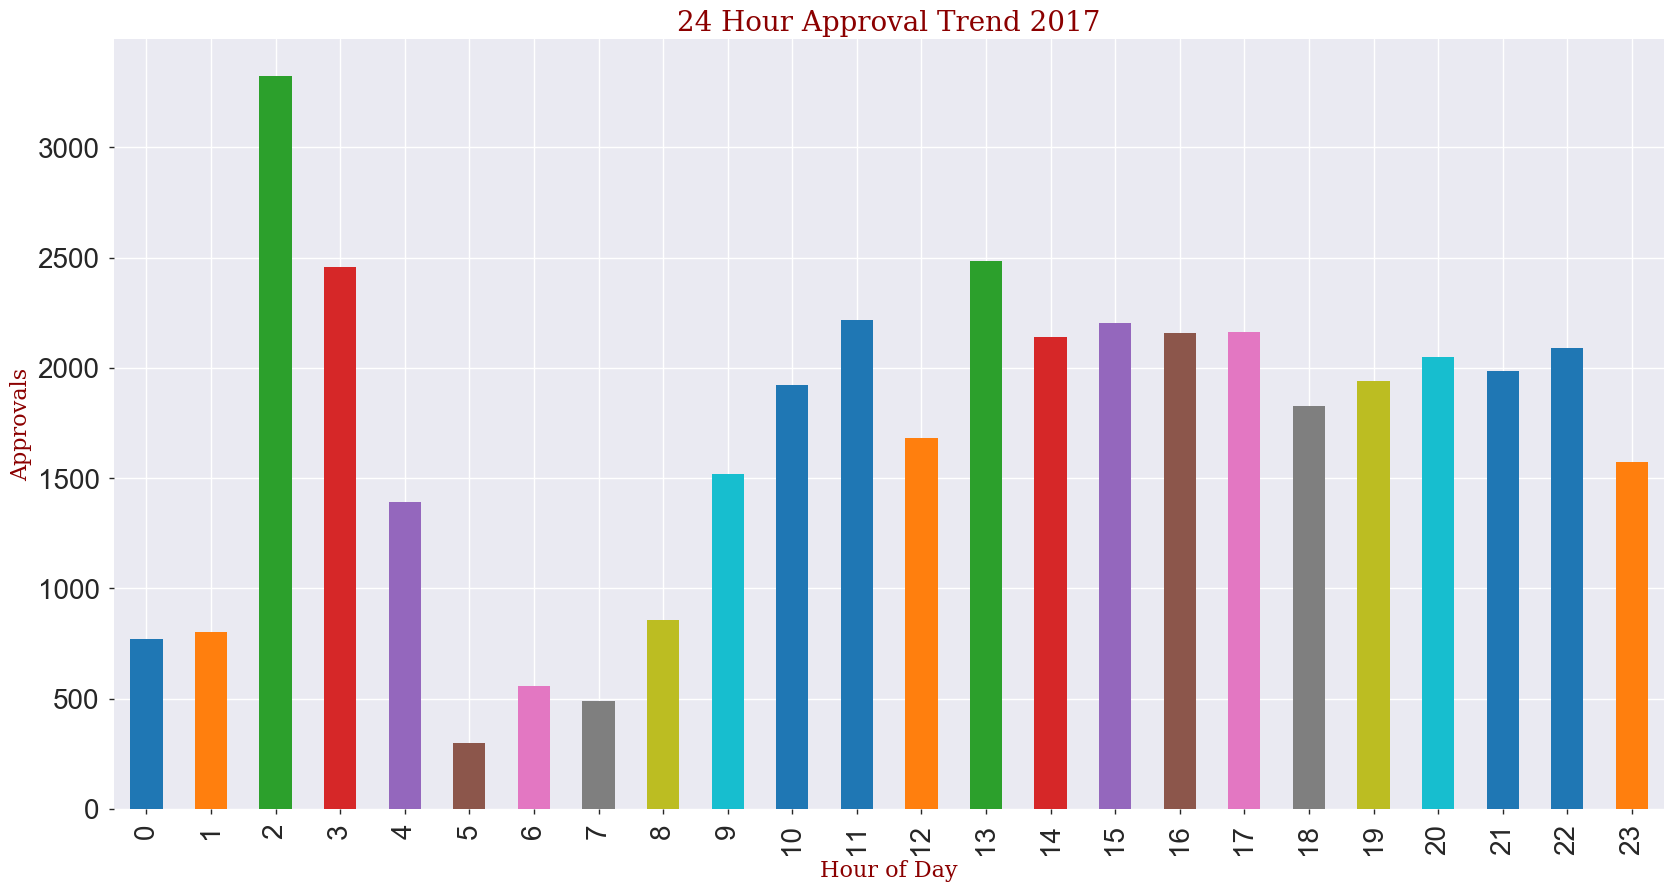

In [34]:
od[od.od_year == 2017]['order_approved_at'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Approval Trend 2017', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Approvals', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

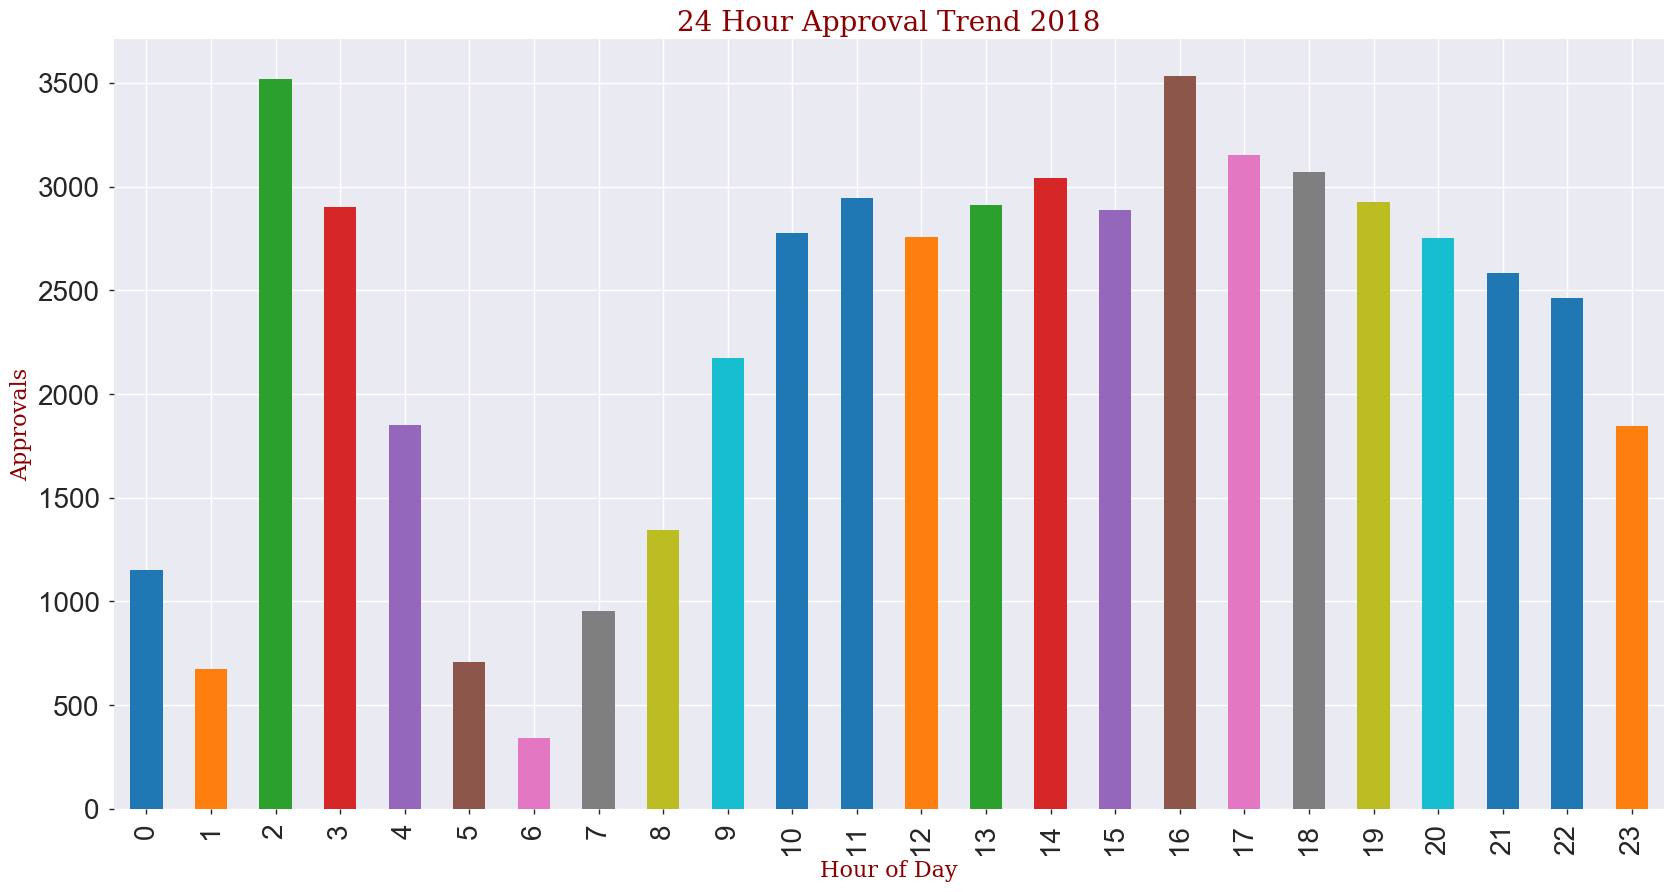

In [35]:
od[od.od_year == 2018]['order_approved_at'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Approval Trend 2018', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Approvals', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

<a id="section50501"></a>
#### 5.5.1. Observations
* Significant number of approvals in between 2-3am for both 2017 & 2018
* Consistent approvals from morning to late evening
* More approvals in 2018

<a id="section506"></a>
#### 5.6. What is the 24 hour carrier handover trend by the sellers?

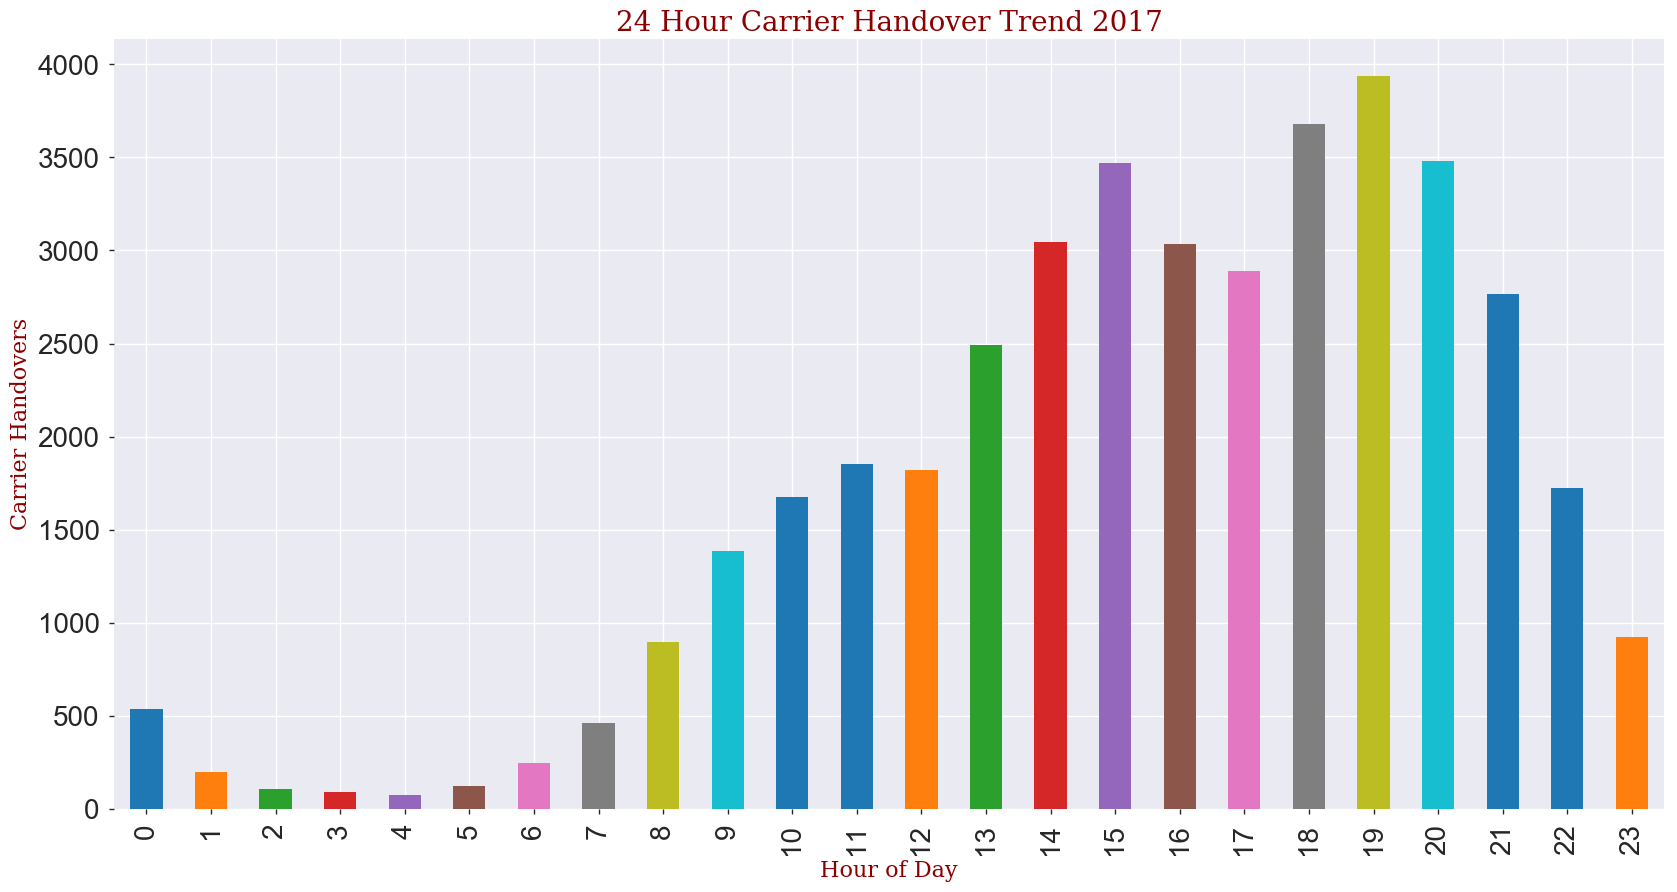

In [36]:
od[od.od_year == 2017]['order_delivered_carrier_date'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Carrier Handover Trend 2017', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Carrier Handovers', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

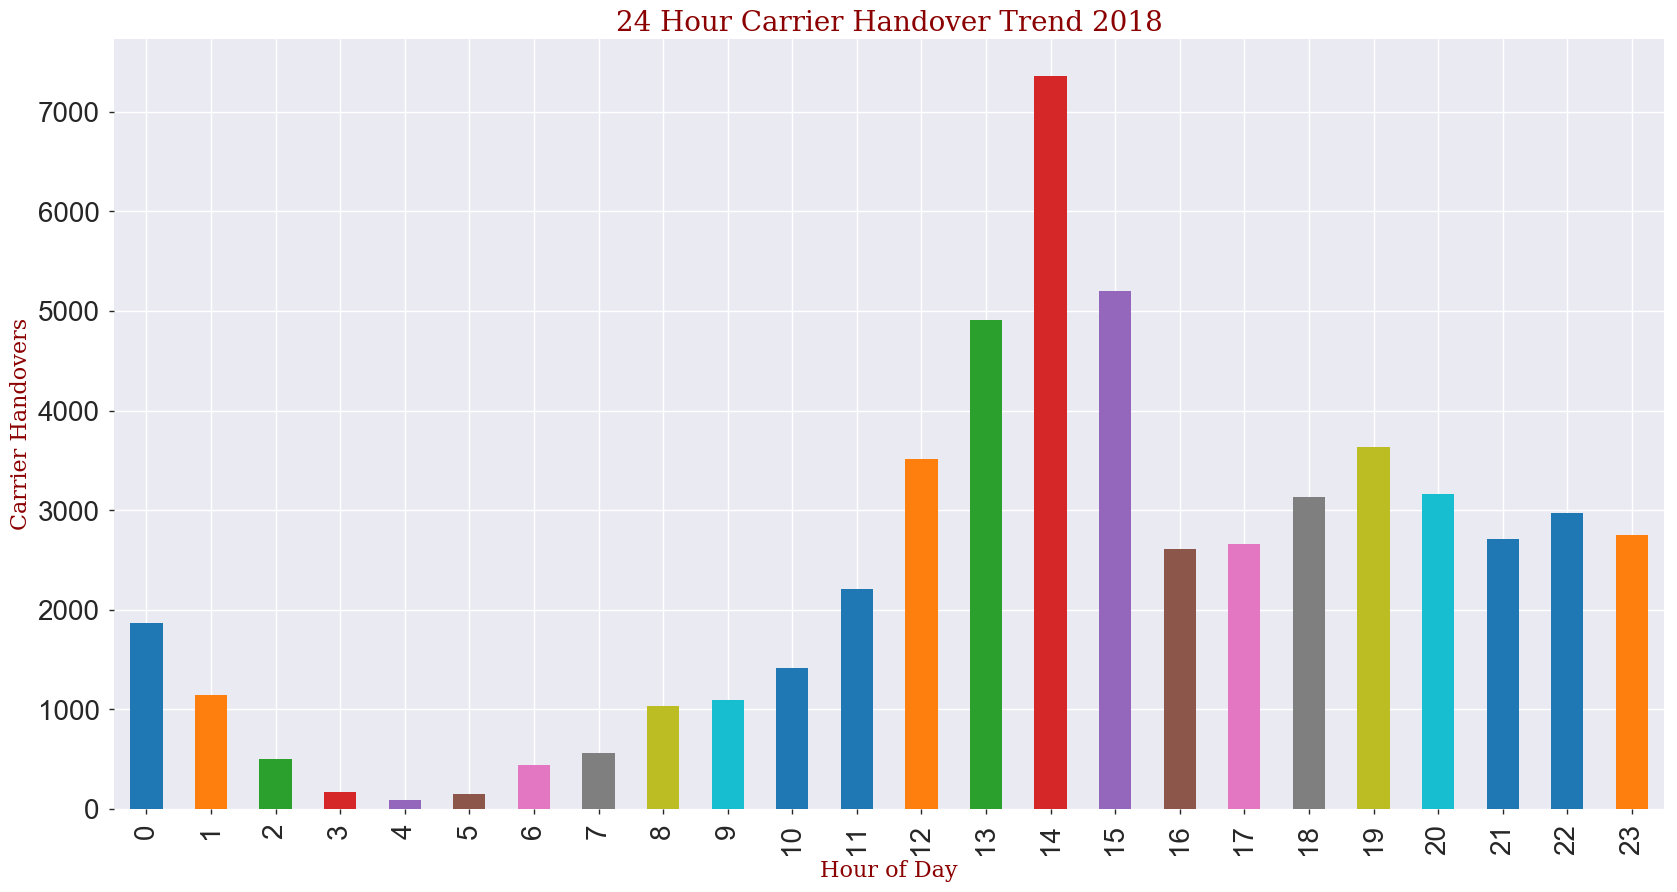

In [37]:
od[od.od_year == 2018]['order_delivered_carrier_date'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Carrier Handover Trend 2018', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Carrier Handovers', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

<a id="section50601"></a>
#### 5.6.1. Observations
* Rare carrier handovers from midnight to early morning
* Significant carrier handovers at 2pm in 2018

<a id="section507"></a>
#### 5.7. What is the 24 hour customer handover trend by the carriers?

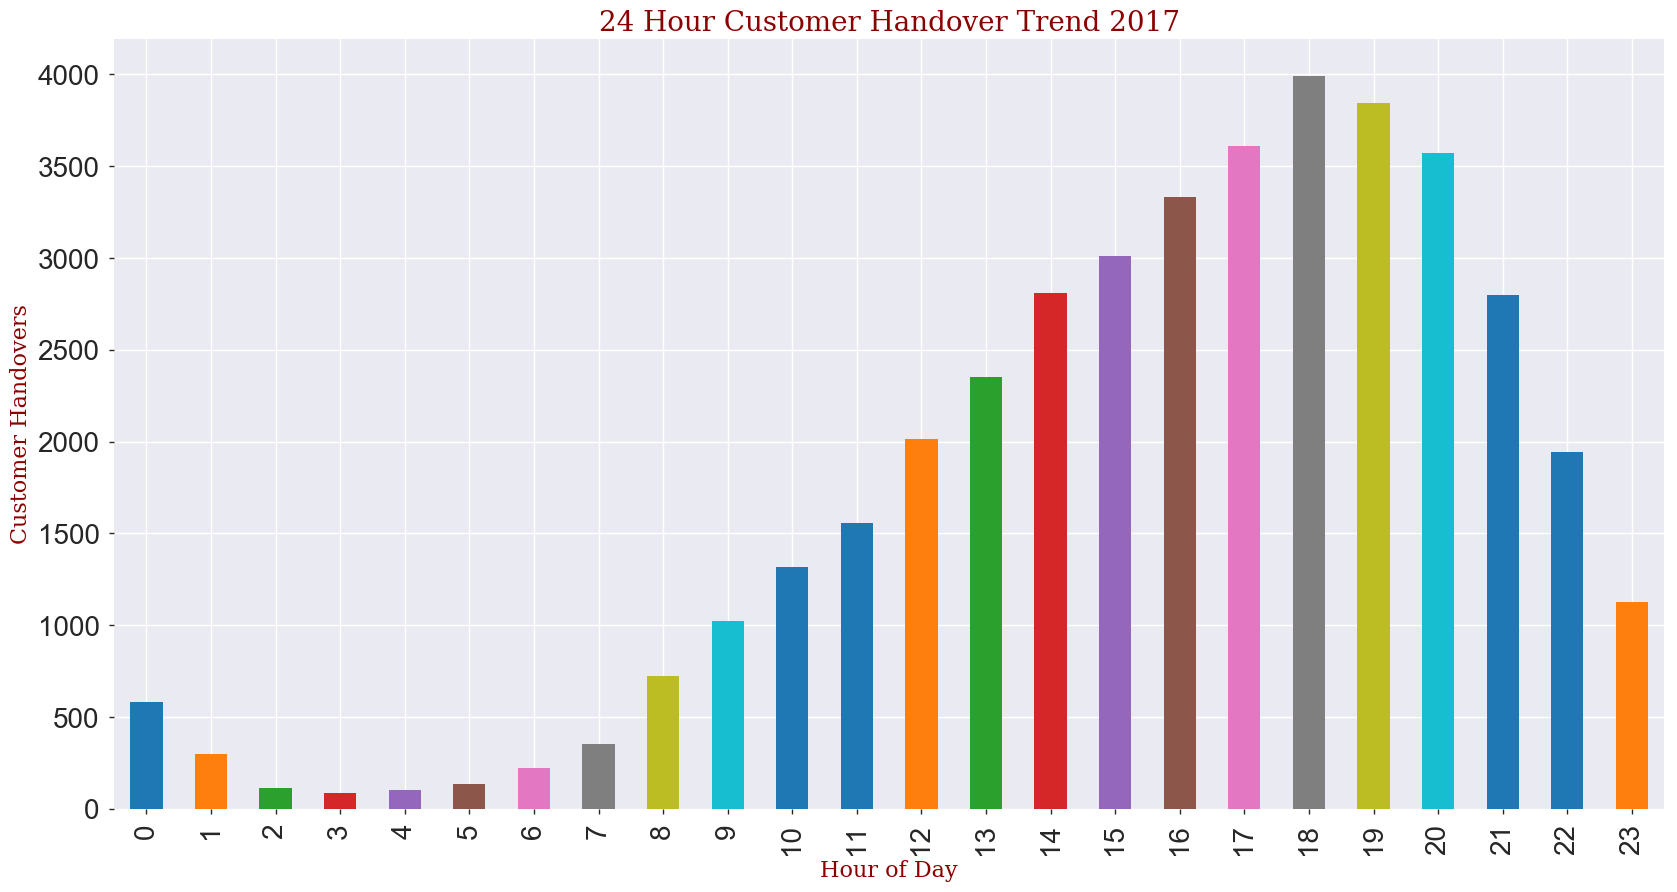

In [38]:
od[od.od_year == 2017]['order_delivered_customer_date'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Customer Handover Trend 2017', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Customer Handovers', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

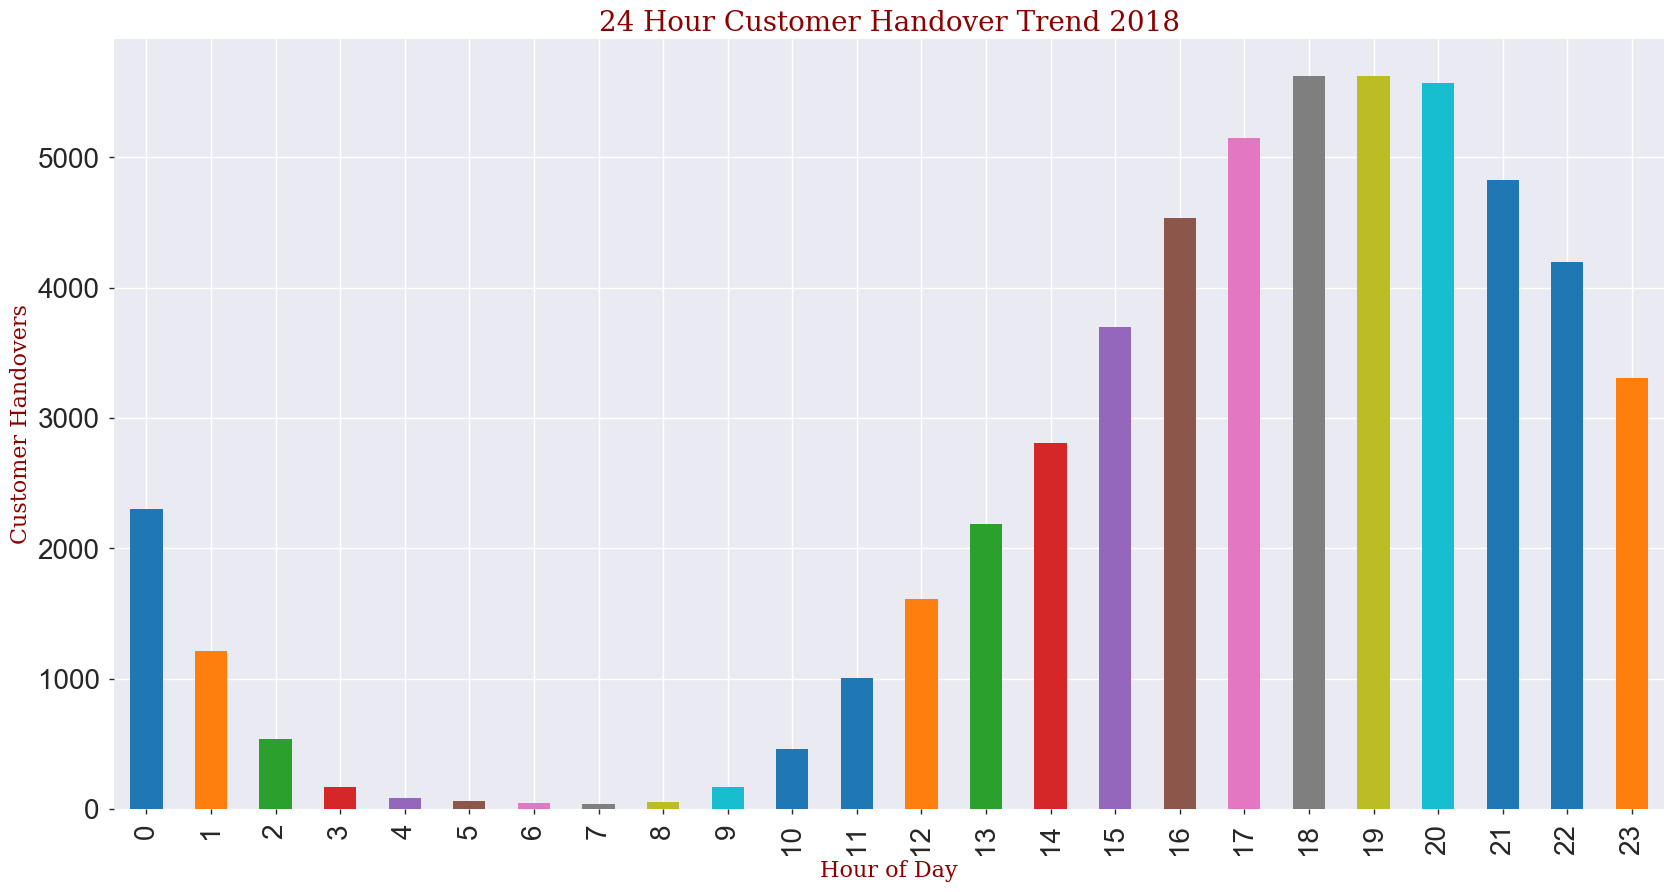

In [39]:
od[od.od_year == 2018]['order_delivered_customer_date'].dt.hour.value_counts().sort_index().plot.bar()
plt.title('24 Hour Customer Handover Trend 2018', size=20, fontdict=font)
plt.xlabel('Hour of Day', fontdict=font)
plt.xticks(fontsize=20)
plt.ylabel('Customer Handovers', fontdict=font)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20, 10)

<a id="section50701"></a>
#### 5.7.1. Observations
* Rare customer handovers from midnight to early mornings
* Consistent gradual maxima till 7-8pm

<a id="section6"></a>
### 6. Conclusions
* 97% of purchases were delivered to customer, less than 3% had issues at multiple levels; approval, delivery to carrier, delivery to customer
* Both seller and carrier exhibit a similar characteristic. Delivery throughput(number of orders deliveries) decreases with Delivery time at first, reaches a minima, then delivery throughput starts increasing with delivery time.
* Usually the item reaches customer 5-7 hours earlier than the promised estimated time of delivery
* Usually, the orders are approved within 2.5 hours of purchase
* The bottlenecks of delivery from purchase to customer handover are at seller and carrier.
* Carrier has improved its customer delivery hours variation in 2018
* Seller has consistently been the bottleneck in delivery, except first quarter of 2018
* Customer handover delivery duration has been more consistent since may 2018
* Almost consistent sale increase over months in 2017
* Irregular orders over months in 2018
* Orders in 2018 more than 2017
* Weekends see less orders as compared to weekdays
* Rare purchases from midnight to early morning
* Significant number of approvals in between 2-3am for both 2017 & 2018
* Rare carrier handovers from midnight to early morning
* Significant carrier handovers at 2pm in 2018
* Rare customer handovers from midnight to early mornings
* Consistent gradual maxima till 7-8pm